# Chapter 9. Plotting and Visualization

## A brief matplotlib API primer

In [1]:
import matplotlib.pyplot as plt
import numpy as np

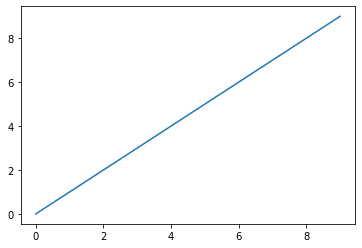

In [2]:
data = np.arange(10)
plt.plot(data)

While libraries like seaborn and pandas’s built-in plotting functions will deal with many of the mundane details of making plots, should you wish to customize them beyond the function options provided, you will need to learn a bit about the matplotlib API.

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands. plt.figure has a number of options; notably, figsize will guarantee the figure has a certain size and aspect ratio if saved to disk. You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:

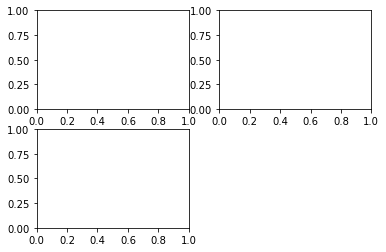

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1).

In [7]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))